## Importing Packages

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from joblib import dump
import matplotlib.pyplot as plt

##

## TRAINING MODEL

In [3]:
df = pd.read_csv("mnist.csv")

In [4]:
X = df.drop(columns=['label']).values         # Sets X equal to the pixel values that make up the number
y = df['label']                               # Sets Y equal to the dependent variable, which is the label of the number

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)    # Splits data into 80% training and 20% testing

In [6]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [7]:
neigh.fit(X_train, y_train)        # training the model

KNeighborsClassifier(n_neighbors=3)

In [8]:
predicted = neigh.predict(X_test)      # testing the model

## Saving Model to be used for UI

In [9]:
dump(neigh, 'trained_knn_model.joblib')

['trained_knn_model.joblib']

##

## EVALUATING MODEL 

## Classification Report

In [10]:
report = metrics.classification_report(y_test, predicted, output_dict=True)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1147
           1       0.96      1.00      0.98      1369
           2       0.98      0.97      0.97      1197
           3       0.96      0.96      0.96      1259
           4       0.98      0.97      0.97      1134
           5       0.97      0.97      0.97      1075
           6       0.98      0.99      0.98      1184
           7       0.97      0.98      0.98      1253
           8       0.99      0.93      0.96      1149
           9       0.96      0.96      0.96      1233

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



##

## Confusion Matrix

In [11]:
print(metrics.confusion_matrix(y_test, predicted))

[[1141    2    1    0    0    1    2    0    0    0]
 [   0 1364    2    0    1    0    0    1    0    1]
 [   4   13 1158    5    2    0    2   12    1    0]
 [   3    4    8 1211    0   15    1    7    6    4]
 [   0   12    0    1 1095    0    3    1    0   22]
 [   3    1    2   12    1 1038   15    0    1    2]
 [   6    4    0    0    0    4 1168    0    2    0]
 [   0    6    4    0    5    0    0 1230    0    8]
 [   3   20    7   18    4   12    4    2 1069   10]
 [   5    2    0   12   12    1    1   13    2 1185]]


##

## Bar Graph of F1 Score for Each Digit

In [12]:
f1_scores = [report[str(i)]['f1-score'] for i in range(10)]

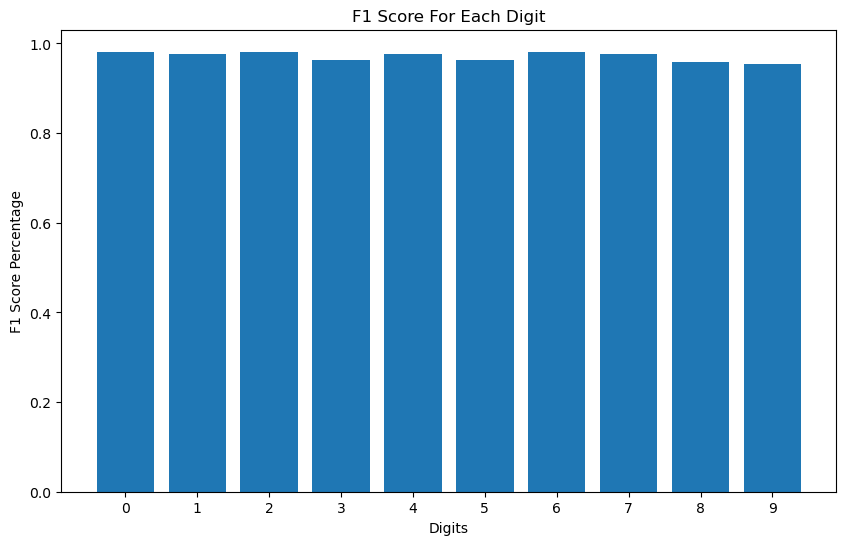

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(range(10), f1_scores)
plt.xlabel('Digits')
plt.ylabel('F1 Score Percentage')
plt.title('F1 Score For Each Digit')
plt.xticks(range(10), [str(i) for i in range(10)])
plt.show()

##

## Histogram of Digit Frequency During Test

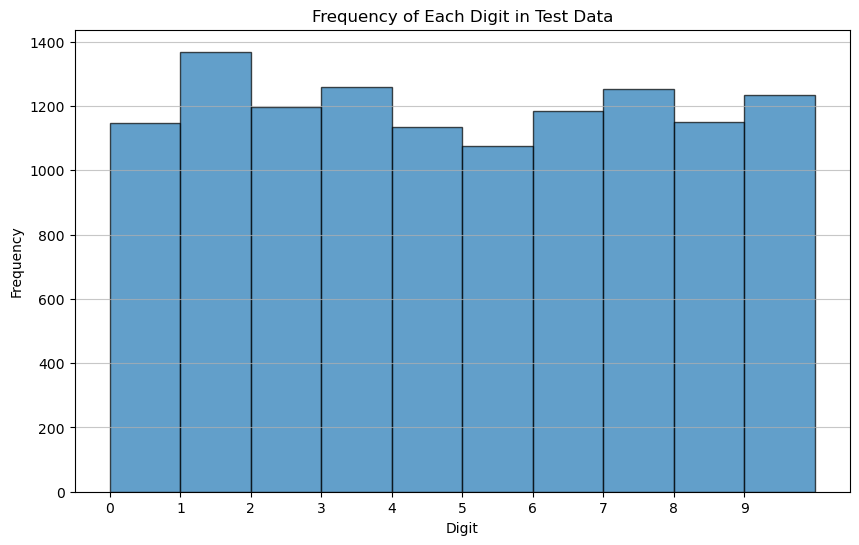

In [13]:
support = [report[str(i)]['support'] for i in range(10)]

plt.figure(figsize=(10, 6))
plt.hist(range(10), weights=support, bins=range(11), edgecolor='black', alpha=0.7)
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Frequency of Each Digit in Test Data')
plt.xticks(range(10), [str(i) for i in range(10)])
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()